In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from pylab import rcParams

In [123]:
!pip install scikit-optimize
from skopt import BayesSearchCV

In [124]:
from skopt import BayesSearchCV

In [125]:
nRows = 2000
df = pd.read_csv('cardio_train.csv', delimiter=';', nrows = nRows)

In [126]:
df.shape

(2000, 13)

In [127]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [128]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1406.266000,19441.585000,1.36000,164.383000,74.395450,126.878000,93.497000,1.382000,1.237500,0.089500,0.052000,0.79000,0.493000
std,815.649905,2505.794143,0.48012,8.072478,14.896362,24.942518,107.112728,0.694491,0.587594,0.285535,0.222083,0.40741,0.500076
min,0.000000,14307.000000,1.00000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,717.500000,17557.000000,1.00000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,1388.000000,19712.000000,1.00000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,2117.500000,21297.250000,2.00000,170.000000,82.250000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000
max,2826.000000,23661.000000,2.00000,198.000000,200.000000,902.000000,1200.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   age          2000 non-null   int64  
 2   gender       2000 non-null   int64  
 3   height       2000 non-null   int64  
 4   weight       2000 non-null   float64
 5   ap_hi        2000 non-null   int64  
 6   ap_lo        2000 non-null   int64  
 7   cholesterol  2000 non-null   int64  
 8   gluc         2000 non-null   int64  
 9   smoke        2000 non-null   int64  
 10  alco         2000 non-null   int64  
 11  active       2000 non-null   int64  
 12  cardio       2000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 203.2 KB


In [130]:
#drop ID column

df = df.drop('id', axis = 1)
print(df)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0     18393       2     168    62.0    110     80            1     1      0   
1     20228       1     156    85.0    140     90            3     1      0   
2     18857       1     165    64.0    130     70            3     1      0   
3     17623       2     169    82.0    150    100            1     1      0   
4     17474       1     156    56.0    100     60            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
1995  21895       2     167    75.0    130     80            1     1      0   
1996  18199       1     157    72.0    110     70            1     1      0   
1997  18067       1     156    52.0    150     80            1     1      1   
1998  17729       2     168    69.0    120     80            2     1      0   
1999  18989       1     160    65.0    120     80            1     1      0   

      alco  active  cardio  
0        0       1    

Data Manipulation

Convert age from days to years

In [131]:
df['age'] = (df['age']/365).round().astype('int')

print(df)

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      50       2     168    62.0    110     80            1     1      0   
1      55       1     156    85.0    140     90            3     1      0   
2      52       1     165    64.0    130     70            3     1      0   
3      48       2     169    82.0    150    100            1     1      0   
4      48       1     156    56.0    100     60            1     1      0   
...   ...     ...     ...     ...    ...    ...          ...   ...    ...   
1995   60       2     167    75.0    130     80            1     1      0   
1996   50       1     157    72.0    110     70            1     1      0   
1997   49       1     156    52.0    150     80            1     1      1   
1998   49       2     168    69.0    120     80            2     1      0   
1999   52       1     160    65.0    120     80            1     1      0   

      alco  active  cardio  
0        0       1       0  
1        0       

<Axes: >

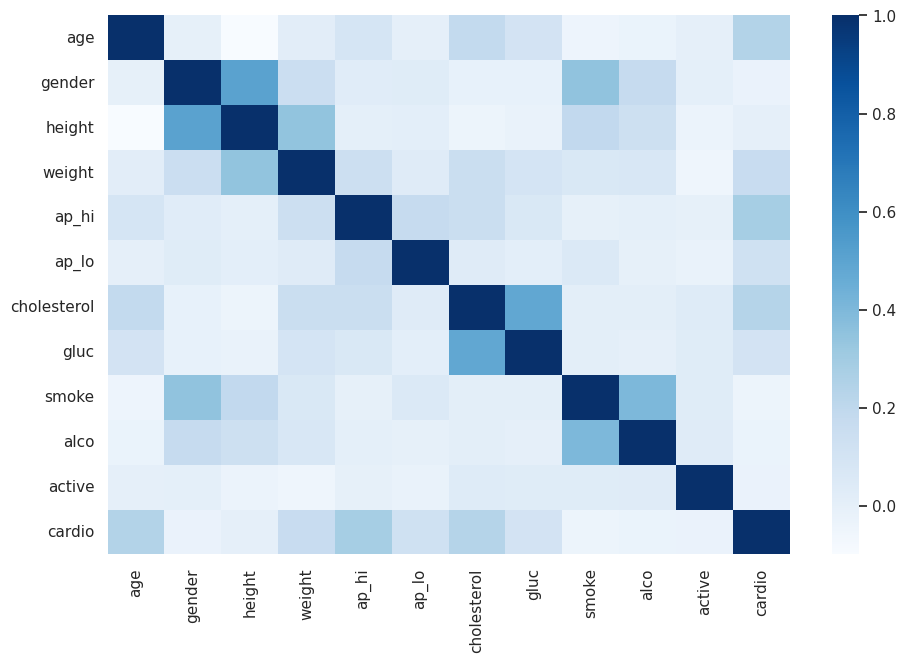

In [132]:
figsize=(10,10)

# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues")

Impact of age on cholesterol

In [133]:
#cholesterol level
cholesterol_level = df.groupby('age')['cholesterol'].mean()

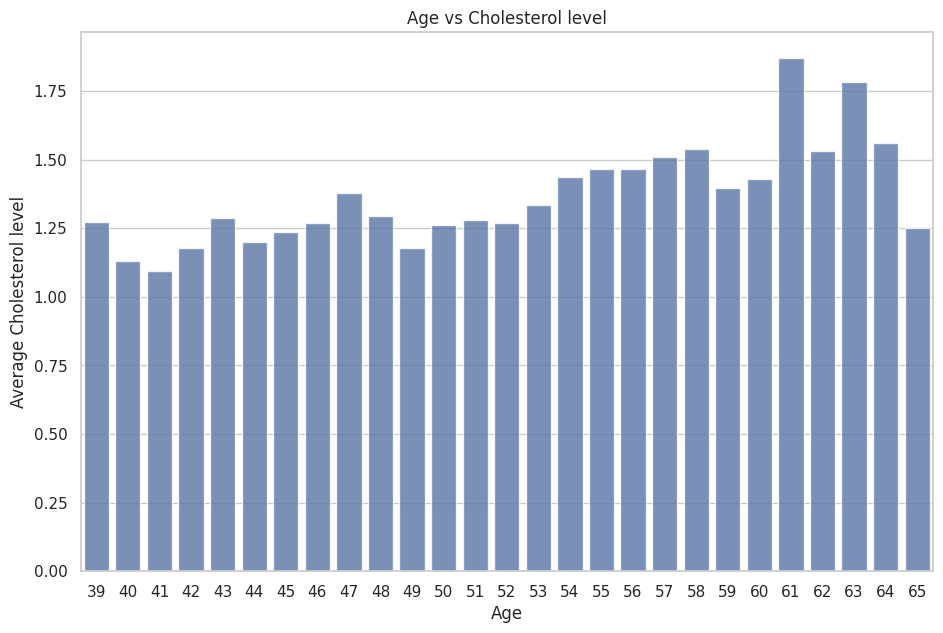

In [134]:
sns.barplot(x = cholesterol_level.index, y = cholesterol_level.values, alpha = 0.8)
plt.xlabel("Age")
plt.ylabel("Average Cholesterol level")
plt.title("Age vs Cholesterol level")
plt.show()

Level of cholesterol gradually increases as patients get older and older, with its peak after achieveing 60 years old. Afterwards, the cholesterol level decreases to 1.2 when 65 years old are achieved.

Since we have BMI column, drop weight and height

Impact of age on cardio or active

In [135]:
cardio_risk_age = df.groupby('age')['cardio'].mean()

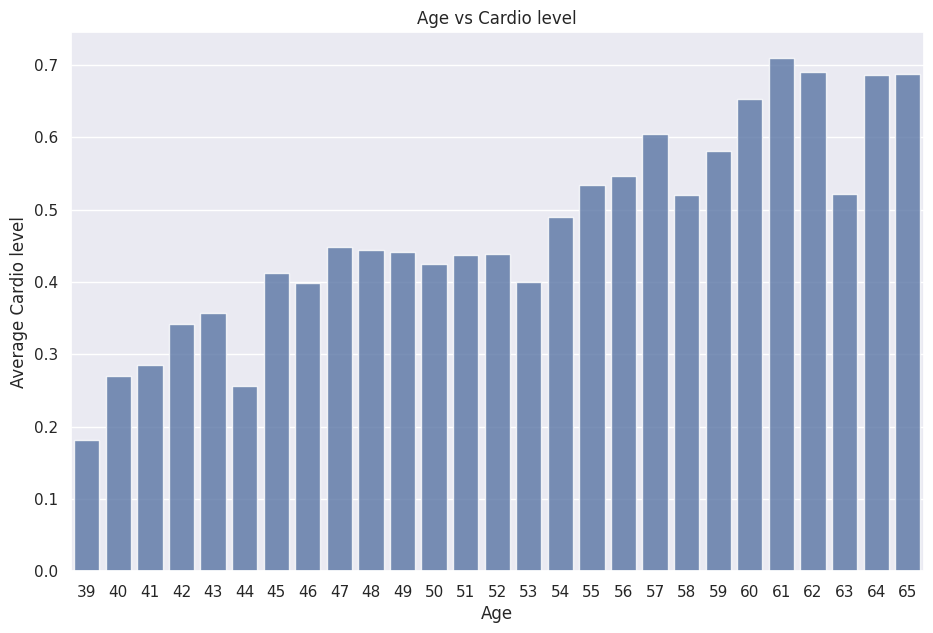

In [136]:
sns.set(rc={'figure.figsize':(11,7)})
sns.barplot(x = cardio_risk_age.index, y = cardio_risk_age.values, alpha=0.8).set(title = "Age vs Cardio level")
plt.xlabel("Age")
plt.ylabel("Average Cardio level")
plt.show()

Transform height and weight to BMI to ease categorization

In [137]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


Categorize BMI in 5 categories

In [138]:
conditions = [
    (df["BMI"] <= 15),                            # 0 - Anorexic
    (df["BMI"] > 15) & (df["BMI"] <= 18.5),       # 1 - Underweight
    (df["BMI"] > 18.5) & (df["BMI"] <= 25),       # 2 - Normal weight
    (df["BMI"] > 25) & (df["BMI"] <= 30),         # 3 - Overweight
    (df["BMI"] > 30) & (df["BMI"] <= 35),         # 4 - Obesity Class I
    (df["BMI"] > 35) & (df["BMI"] <= 40),         # 5 - Obesity Class II
    (df["BMI"] > 40)                              # 6 - Obesity Class III
]

bmi_category = [0, 1, 2, 3, 4, 5, 6]

df["bmi_category"] = np.select(conditions, bmi_category)

Replace BMI cateogry with professional medical terms

In [139]:
df2 = df.copy()
df2['bmi_category'].replace({1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity I', 5: 'Obesity II', 6: 'Obesity III'}, inplace = True)

Convert gender from '1' and '2' to labels: women, men, respectively

In [140]:
df2['gender'].replace({1: 'Female', 2: 'Male'}, inplace = True)

Number of women and men in dataset

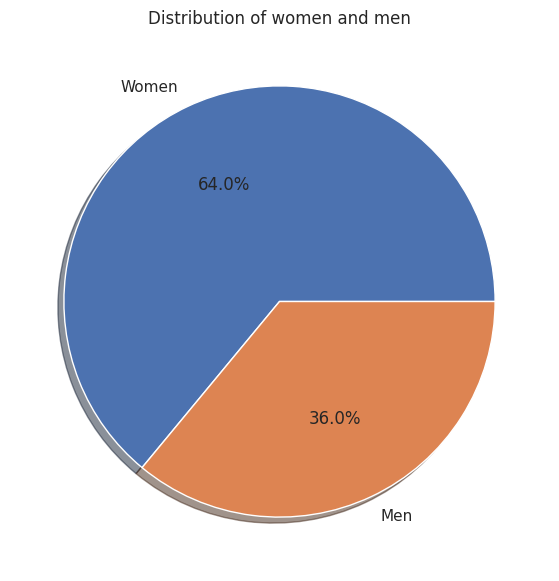

In [141]:
Gender = df2['gender'].value_counts()
labels = 'Women', 'Men'
plt.pie(Gender, autopct='%1.1f%%', labels=labels, shadow=True)

plt.title("Distribution of women and men")
plt.show()

In [142]:
pd.crosstab(df2['gender'], df2['bmi_category'])

bmi_category,Normal,Obesity I,Obesity II,Obesity III,Overweight,Underweight
gender,,,,,,
Female,453,229,100,44,444,10
Male,283,116,25,5,285,6


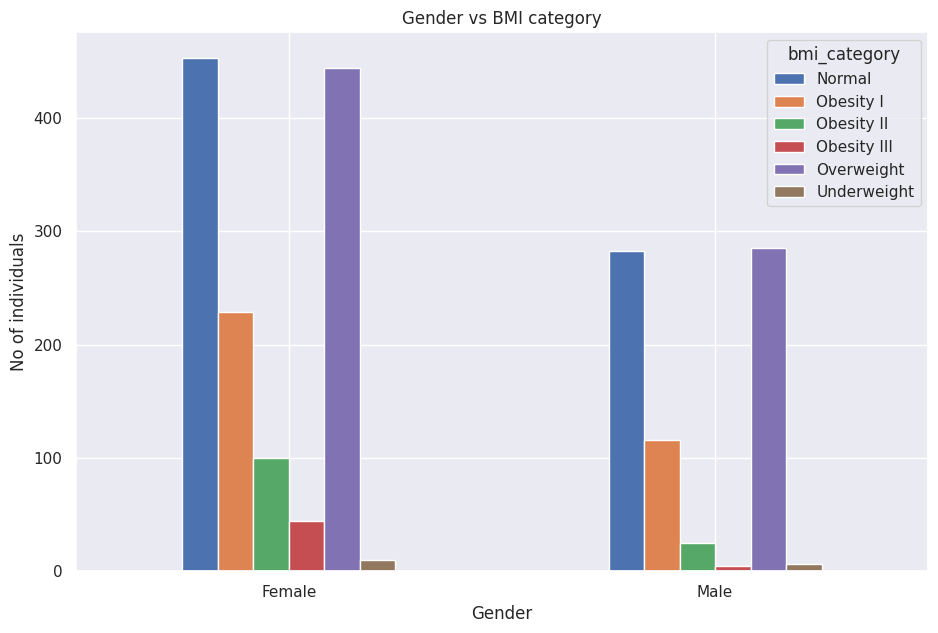

In [143]:
#bmi category vs age
ax = pd.crosstab(df2['gender'], df2['bmi_category']).plot(kind='bar', rot=0)
plt.title("Gender vs BMI category")
plt.xlabel("Gender")
plt.ylabel("No of individuals")

plt.show()

Average Cardio level increased as patients became older and older. There are sudden downs, eg. at age 63, which may explain a sudden increase in cholesterol level.

Let's check distribution of patients against cholesterol level

In [144]:
#classify cholesterol levels
df2['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)

Distribution of people with different cholesterol levels

In [145]:
distr = df2['cholesterol'].value_counts()

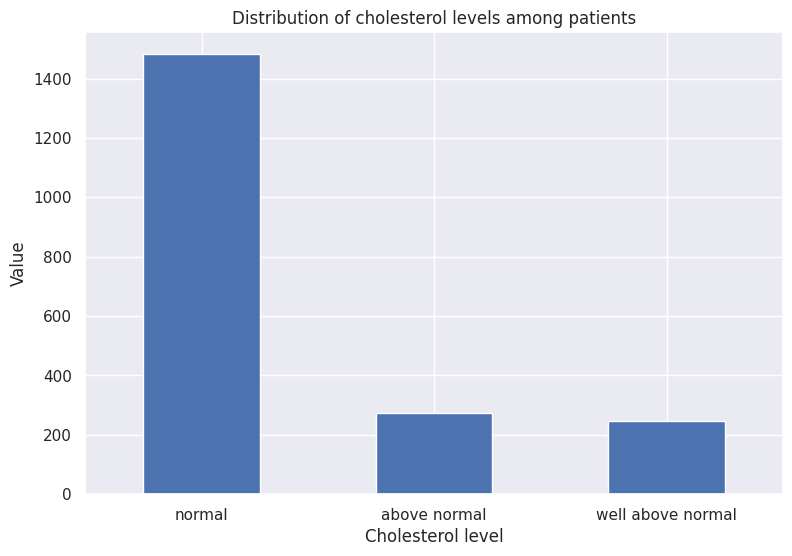

In [146]:
fig = plt.figure(figsize=(9,6))
distr.plot.bar(x = distr, rot=360)
plt.xlabel("Cholesterol level")
plt.ylabel("Value")
plt.title("Distribution of cholesterol levels among patients")
plt.show()

# Data Cleaning

Checking for missing values

In [147]:
print(df.isnull().sum())

age             0
gender          0
height          0
weight          0
ap_hi           0
ap_lo           0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
BMI             0
bmi_category    0
dtype: int64


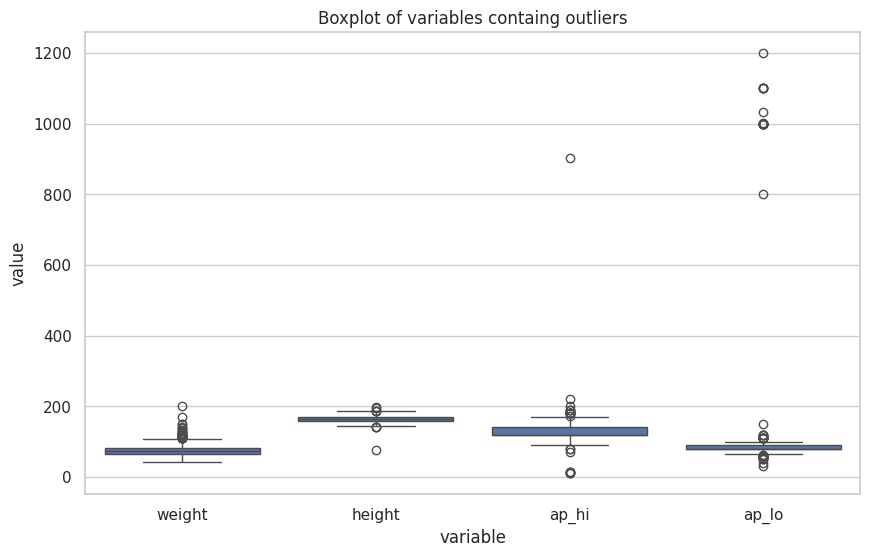

In [148]:
dfO = pd.DataFrame(data = df, columns = ['weight', 'height', 'ap_hi', 'ap_lo'])

sns.set(style="whitegrid")

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="variable", y="value", data=pd.melt(dfO)).set(title='Boxplot of variables containg outliers')
plt.show()

There are number of outliers in all four variables, especially in 'ap_hi' and 'ap_lo'

Removal of outliers using IQR method

In [149]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

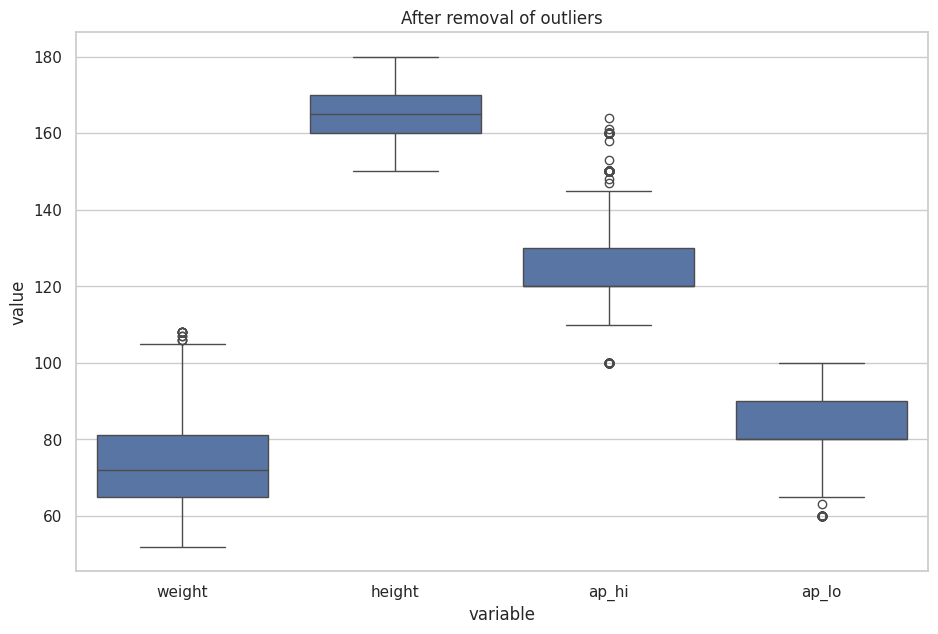

In [150]:
#data without outliers
df_O = pd.DataFrame(data = df, columns = ['weight', 'height', 'ap_hi', 'ap_lo'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_O)).set(title='After removal of outliers')
plt.show()

In [151]:
df.shape

(1724, 14)

Number of variables were reduced from 2000 to 1727

Data Modelling:

Define independent and dependent variables

In [152]:
x = df.drop('cardio', axis=1)
y = df['cardio']


In [153]:
np.unique(y, return_counts=True)

(array([0, 1]), array([884, 840]))

Normalize data using MinMax Scaler

In [154]:
#a = df.values #returns a numpy array
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(x)
dfS = pd.DataFrame(data_scaled)

In [155]:
dfS

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.423077,1.0,0.600000,0.178571,0.15625,0.50,0.0,0.0,0.0,0.0,1.0,0.175827,0.2
1,0.615385,0.0,0.200000,0.589286,0.62500,0.75,1.0,0.0,0.0,0.0,1.0,0.664738,0.6
2,0.500000,0.0,0.500000,0.214286,0.46875,0.25,1.0,0.0,0.0,0.0,0.0,0.233946,0.2
3,0.346154,1.0,0.633333,0.535714,0.78125,1.00,0.0,0.0,0.0,0.0,1.0,0.430206,0.4
4,0.346154,0.0,0.200000,0.071429,0.00000,0.00,0.0,0.0,0.0,0.0,0.0,0.215212,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,0.807692,1.0,0.566667,0.410714,0.46875,0.50,0.0,0.0,0.0,0.0,1.0,0.361620,0.4
1720,0.423077,0.0,0.233333,0.357143,0.15625,0.25,0.0,0.0,0.0,0.0,1.0,0.449054,0.4
1721,0.384615,0.0,0.200000,0.000000,0.78125,0.50,0.0,0.0,1.0,0.0,0.0,0.153208,0.2
1722,0.384615,1.0,0.600000,0.303571,0.31250,0.50,0.5,0.0,0.0,0.0,0.0,0.269386,0.2


Data Modelling

In [156]:
X = dfS.copy()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

Check if target variable is imbalanced

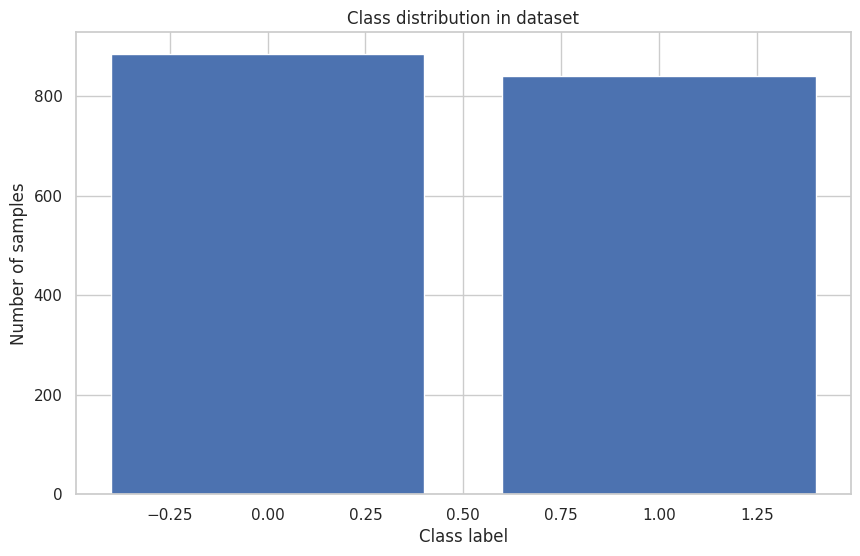

In [158]:
unique_labels, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(10,6))
plt.bar(unique_labels, counts )
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')

plt.show()

Above bar plot suggests the y variable (target one) is not imbalanced, thus there is no need to use over/uunder sampling algorithms

Logistic Regression

In [159]:
LR = LogisticRegression()

In [160]:
LR.fit(X_train,y_train)

LogisticRegression()

In [161]:
LR.score(X_test, y_test)

0.6869565217391305

Random Forest Classifier

In [162]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train,y_train)

print('Train Accuracy: ', rand_forest.score(X_train,y_train))
print('Test Accuracy: ', rand_forest.score(X_test,y_test))

Train Accuracy:  0.9992748368382887
Test Accuracy:  0.6985507246376812


Model Optimisation - to optimise and improve test accuracy, using GridSearchCV

In [163]:
Grid_SetUp = {'n_estimators': [200, 400],
                   'max_features': ['sqrt', 'log2'],
                   'max_depth': [5, 50, 100],
                   'min_samples_split': [5, 10, 15],
                   'min_samples_leaf': [1, 5, 10],
                   'criterion': ['gini']
                   }

grid_best_params = {
    'n_estimators': [400],
    'max_depth': [50],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'max_features': [None],
}
rf_gridsearch = GridSearchCV(estimator=rand_forest,param_grid=grid_best_params, cv=5, scoring='accuracy',n_jobs=-1)

In [164]:
rf_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [50], 'max_features': [None],
                         'min_samples_leaf': [5], 'min_samples_split': [10],
                         'n_estimators': [400]},
             scoring='accuracy')

In [165]:
#performance
print("Test Accuracy :", rf_gridsearch.score(X_test, y_test))

Test Accuracy : 0.7130434782608696


Bayesian SearchCV

In [166]:
#define parameters
params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": (1, 9),
    "criterion": ["gini", "entropy"],
}

In [167]:
model = BayesSearchCV(
    estimator=rand_forest,
    search_spaces=params,
    n_jobs=1,
    cv=5,
    n_iter=30,
    scoring="accuracy",
    verbose=4,
    random_state=42
)

In [168]:
model.fit(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.736 total time=   2.8s
[CV 2/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.722 total time=   3.8s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.733 total time=   2.6s
[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.716 total time=   2.2s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=400;, score=0.683 total time=   2.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.748 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.733 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.736 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=200;, score=0.710 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.728 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.730 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.754 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.719 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.683 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.742 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.719 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.739 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.707 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.674 total time=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.745 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.725 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.733 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.704 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.733 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.719 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.742 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.722 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.677 total time=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=400;, score=0.745 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=400;, score=0.722 total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=400;, score=0.730 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=400;, score=0.704 total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.736 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.728 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.742 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.704 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.672 total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.739 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.722 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.745 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.722 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=300;, score=0.745 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=300;, score=0.730 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=300;, score=0.742 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=300;, score=0.716 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=300;, score=0.677 total time=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=100;, score=0.716 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=100;, score=0.736 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=100;, score=0.728 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=100;, score=0.701 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=400;, score=0.742 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=400;, score=0.725 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=400;, score=0.736 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=400;, score=0.710 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=400;, score=0.680 total time=   0.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=400;, score=0.745 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=9, n_estimators=400;, score=0.730 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=400;, score=0.739 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=400;, score=0.704 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
              random_state=42, scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': (1, 9),
                             'n_estimators': [100, 200, 300, 400]},
              verbose=4)

BayesianSearCV provided better accuracy than GridSearch CV about 1.4%

In [169]:
print(model.best_score_)
print(model.best_params_)

0.7227148634984834
OrderedDict([('criterion', 'gini'), ('max_depth', 5), ('n_estimators', 300)])
